In [27]:
import pandas as pd
import requests
import json
import urllib.request
import plotly.express as px
import numpy as np
from geopandas import GeoDataFrame
from shapely.geometry import Point
import geopandas as gpd
import matplotlib.pyplot as plt;
import plotly.express as px
from itertools import groupby 

In [7]:
endpoint = "https://developer.nps.gov/api/v1/parks?limit=500"
HEADERS = {"X-Api-Key":"OmN6PcZlDJvcGyh1Y88kO3EX2dG5DtfRg8ekNDQQ"}
req = urllib.request.Request(endpoint,headers=HEADERS)
response = urllib.request.urlopen(req)
data = response.read()
json_data = json.loads(data.decode('utf-8'))
park = json_data['data']
pd.DataFrame.from_dict(park)

,id,url,fullName,parkCode,description,latitude,longitude,latLong,activities,topics,...,entrancePasses,fees,directionsInfo,directionsUrl,operatingHours,addresses,images,weatherInfo,name,designation
0,77E0D7F0-1942-494A-ACE2-9004D2BDC59E,https://www.nps.gov/abli/index.htm,Abraham Lincoln Birthplace National Historical...,abli,For over a century people from around the worl...,37.5858662,-85.67330523,"lat:37.5858662, long:-85.67330523",[{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238'...,[{'id': 'D10852A3-443C-4743-A5FA-6DD6D2A054B3'...,...,[],[],The Birthplace Unit of the park is located app...,http://www.nps.gov/abli/planyourvisit/directio...,"[{'exceptions': [{'exceptionHours': {}, 'start...","[{'postalCode': '42748', 'city': 'Hodgenville'...","[{'credit': 'NPS Photo', 'title': 'The Memoria...",There are four distinct seasons in Central Ken...,Abraham Lincoln Birthplace,National Historical Park
1,6DA17C86-088E-4B4D-B862-7C1BD5CF236B,https://www.nps.gov/acad/index.htm,Acadia National Park,acad,Acadia National Park protects the natural beau...,44.409286,-68.247501,"lat:44.409286, long:-68.247501",[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,...,"[{'cost': '70.00', 'description': 'The Acadia ...",[],"From Boston take I-95 north to Augusta, Maine,...",http://www.nps.gov/acad/planyourvisit/directio...,"[{'exceptions': [], 'description': 'Acadia Nat...","[{'postalCode': '04609', 'city': 'Bar Harbor',...","[{'credit': 'NPS / Kristi Rugg', 'title': 'Aca...","Located on Mount Desert Island in Maine, Acadi...",Acadia,National Park
2,E4C7784E-66A0-4D44-87D0-3E072F5FEF43,https://www.nps.gov/adam/index.htm,Adams National Historical Park,adam,From the sweet little farm at the foot of Penn...,42.2553961,-71.01160356,"lat:42.2553961, long:-71.01160356",[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': 'F3883A66-A7CB-461B-868E-1B5932224B25'...,...,"[{'cost': '45.00', 'description': 'Adams Natio...",[],"Traveling on U.S. Interstate 93, take exit 7 -...",http://www.nps.gov/adam/planyourvisit/directio...,"[{'exceptions': [{'exceptionHours': {}, 'start...","[{'postalCode': '02169', 'city': 'Quincy', 'st...","[{'credit': 'NPS Photo', 'title': 'The John an...","Be prepared for hot, humid weather. The histor...",Adams,National Historical Park
3,1A47416F-DAA3-4137-9F30-14AF86B4E547,https://www.nps.gov/afam/index.htm,African American Civil War Memorial,afam,"Over 200,000 African-American soldiers and sai...",38.9166,-77.026,"lat:38.9166, long:-77.026",[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,...,[],[],The memorial is located at the corner of Vermo...,http://www.nps.gov/afam/planyourvisit/directio...,"[{'exceptions': [], 'description': 'The Africa...","[{'postalCode': '20001', 'city': 'Washington',...","[{'credit': 'NPS Photo', 'title': 'African Ame...",Washington DC gets to see all four seasons. Hu...,African American Civil War Memorial,
4,E6E1D22A-7A89-47F8-813C-B611059A8CF9,https://www.nps.gov/afbg/index.htm,African Burial Ground National Monument,afbg,African Burial Ground is the oldest and larges...,40.71452681,-74.00447358,"lat:40.71452681, long:-74.00447358",[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,...,[],[],The African Burial Ground National Monument is...,http://www.nps.gov/afbg/planyourvisit/directio...,[{'exceptions': [{'exceptionHours': {'monday':...,"[{'postalCode': '10007', 'city': 'New York', '...","[{'credit': 'NPS Photo', 'title': 'African Bur...",http://forecast.weather.gov/MapClick.php?CityN...,African Burial Ground,National Monument
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,D09FF0F8-B16E-4D2B-9C37-03202D6B8176,https://www.nps.gov/york/index.htm,Yorktown Battlefield Part of Colonial National...,york,Discover what it took for the United States to...,37.2195,-76.4983,"lat:37.2195, long:-76.4983",[{'id': '7CE6E935-

In [8]:
df = pd.DataFrame.from_dict(park)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              471 non-null    object
 1   url             471 non-null    object
 2   fullName        471 non-null    object
 3   parkCode        471 non-null    object
 4   description     471 non-null    object
 5   latitude        471 non-null    object
 6   longitude       471 non-null    object
 7   latLong         471 non-null    object
 8   activities      471 non-null    object
 9   topics          471 non-null    object
 10  states          471 non-null    object
 11  contacts        471 non-null    object
 12  entranceFees    471 non-null    object
 13  entrancePasses  471 non-null    object
 14  fees            471 non-null    object
 15  directionsInfo  471 non-null    object
 16  directionsUrl   471 non-null    object
 17  operatingHours  471 non-null    object
 18  addresses 

# Clean and Tidy

In [9]:
columns = ['fees','id','latLong','entrancePasses','directionsInfo','directionsUrl','addresses','weatherInfo','name','contacts']
df.drop(columns=columns,axis=1,inplace=True)

# df.drop(columns=['latLong','fees','entrancePasses','directionsUrl','directionsInfo','addresses','weatherInfo','name','contacts'],inplace=True)

In [10]:
def column_fix(df,column,name='name'):
    for i in range(len(df[column])):
        a_list = []
        for e in range(len(df[column][i])):
            a_list.append(df[column][i][e][name])
        df[column][i] = a_list
column_fix(df,'activities')
column_fix(df,'topics')

In [26]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              471 non-null    object
 1   url             471 non-null    object
 2   fullName        471 non-null    object
 3   parkCode        471 non-null    object
 4   description     471 non-null    object
 5   latitude        471 non-null    object
 6   longitude       471 non-null    object
 7   activities      471 non-null    object
 8   topics          471 non-null    object
 9   states          471 non-null    object
 10  entranceFees    471 non-null    object
 11  operatingHours  471 non-null    object
 12  images          471 non-null    object
 13  designation     471 non-null    object
dtypes: object(14)
memory usage: 51.6+ KB


In [11]:
df = df.apply(pd.to_numeric, errors = 'ignore')

In [12]:
df['latitude'] = df['latitude'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471 entries, 0 to 470
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   url             471 non-null    object 
 1   fullName        471 non-null    object 
 2   parkCode        471 non-null    object 
 3   description     471 non-null    object 
 4   latitude        470 non-null    float64
 5   longitude       470 non-null    float64
 6   activities      471 non-null    object 
 7   topics          471 non-null    object 
 8   states          471 non-null    object 
 9   entranceFees    471 non-null    object 
 10  operatingHours  471 non-null    object 
 11  images          471 non-null    object 
 12  designation     471 non-null    object 
dtypes: float64(2), object(11)
memory usage: 48.0+ KB


In [32]:
df

,id,url,fullName,parkCode,description,latitude,longitude,activities,topics,states,entranceFees,operatingHours,images,designation
0,77E0D7F0-1942-494A-ACE2-9004D2BDC59E,https://www.nps.gov/abli/index.htm,Abraham Lincoln Birthplace National Historical...,abli,For over a century people from around the worl...,37.585866,-85.673305,[{'id': '13A57703-BB1A-41A2-94B8-53B692EB7238'...,[{'id': 'D10852A3-443C-4743-A5FA-6DD6D2A054B3'...,KY,[],"[{'exceptions': [{'exceptionHours': {}, 'start...","[{'credit': 'NPS Photo', 'title': 'The Memoria...",National Historical Park
1,6DA17C86-088E-4B4D-B862-7C1BD5CF236B,https://www.nps.gov/acad/index.htm,Acadia National Park,acad,Acadia National Park protects the natural beau...,44.409286,-68.247501,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '00F3C3F9-2D67-4802-81AE-CCEA5D3BA370'...,ME,"[{'cost': '6.00', 'description': 'Vehicle rese...","[{'exceptions': [], 'description': 'Acadia Nat...","[{'credit': 'NPS / Kristi Rugg', 'title': 'Aca...",National Park
2,E4C7784E-66A0-4D44-87D0-3E072F5FEF43,https://www.nps.gov/adam/index.htm,Adams National Historical Park,adam,From the sweet little farm at the foot of Penn...,42.255396,-71.011604,[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': 'F3883A66-A7CB-461B-868E-1B5932224B25'...,MA,"[{'cost': '15.00', 'description': 'Access into...","[{'exceptions': [{'exceptionHours': {}, 'start...","[{'credit': 'NPS Photo', 'title': 'The John an...",National Historical Park
3,1A47416F-DAA3-4137-9F30-14AF86B4E547,https://www.nps.gov/afam/index.htm,African American Civil War Memorial,afam,"Over 200,000 African-American soldiers and sai...",38.916600,-77.026000,[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,DC,[],"[{'exceptions': [], 'description': 'The Africa...","[{'credit': 'NPS Photo', 'title': 'African Ame...",
4,E6E1D22A-7A89-47F8-813C-B611059A8CF9,https://www.nps.gov/afbg/index.htm,African Burial Ground National Monument,afbg,African Burial Ground is the oldest and larges...,40.714527,-74.004474,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,NY,[],[{'exceptions': [{'exceptionHours': {'monday':...,"[{'credit': 'NPS Photo', 'title': 'African Bur...",National Monument
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,D09FF0F8-B16E-4D2B-9C37-03202D6B8176,https://www.nps.gov/york/index.htm,Yorktown Battlefield Part of Colonial National...,york,Discover what it took for the United States to...,37.219500,-76.498300,[{'id': '7CE6E935-F839-4FEC-A63E-052B1DEF39D2'...,[{'id': '28AEAE85-9DDA-45B6-981B-1CFCDCC61E14'...,VA,"[{'cost': '15.00', 'description': 'Adult (16 a...",[{'exceptions': [{'exceptionHours': {'wednesda...,"[{'credit': 'NPS Photo/Linda Williams', 'title...",Part of Colonial National Historical Park
467,4324B2B4-D1A3-497F-8E6B-27171FAE4DB2,https://www.nps.gov/yose/index.htm,Yosemite National Park,yose,"Not just a great valley, but a shrine to human...",37.848833,-119.557187,[{'id': '09DF0950-D319-4557-A57E-04CD2F63FF42'...,[{'id': '69693007-2DF2-4EDE-BB3B-A25EBA72BDF5'...,CA,"[{'cost': '35.00', 'description': 'This fee is...","[{'exceptions': [], 'description': 'Yosemite N...","[{'credit': 'NPS Photo', 'title': 'Upper Yosem...",National Park
468,9854D136-AFC0-4966-BB40-FE9323B56A49,https://www.nps.gov/yuho/index.htm,Yucca House National Monument,yuho,Yucca House National Monument preserves a larg...,37.247789,-108.686127,[{'id': 'B33DC9B6-0B7D-4322-BAD7-A13A34C584A3'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A27B'...,CO,[],"[{'exceptions': [], 'description': 'Open year-...","[{'credit': 'NPS Photo', 'title': 'Yucca House...",National Monument
469,6F550E4D-AE26-4250-A674-397E2DF88092,https://www.nps.gov/yuch/index.htm,Yukon - Charley Rivers National Preserve,yuch,"Located in Interior Alaska, Yukon-Charley Rive...",65.093561,-142.796002,[{'id': '071BA73C-1D3C-46D4-A53C-00D5602F7F0E'...,[{'id': '7F81A0CB-B91F-4896-B9A5-41BE9A54A2

In [13]:
def column_fix(column,name='name'):
    for i in range(len(df[column])):
        a_list = []
        for e in range(len(df[column][i])):
            a_list.append(df[column][i][e][name])
        df[column][i] = a_list

In [14]:
df = df.apply(pd.to_numeric, errors = 'ignore')

In [15]:
name_change = [{'fullName':'full_name'},{'parkCode':'park_code'},{'entranceFees':'entrance_fees'},{'operatingHours':'operating_hours'}]
for name in name_change:
    df.rename(columns=name,inplace=True)

In [16]:
cost = []
entrance = []
for i in df['entrance_fees']:
    if len(i) == 0:
        cost.append(0)
        entrance.append('Entrance - Free')
    else:
        if len(i) > 0:
            cost.append([i[c]['cost'] for c in range(len(i))])
        if len(i) > 0:
            entrance.append([i[c]["title"]for c in range(len(i))])

df['cost'] = cost
df['entrance'] = entrance

In [17]:
df.drop(columns='entrance_fees', axis=1, inplace=True)

In [18]:
operating=[]
holidays=[]
for i in df['operating_hours']:
    if len(i)>0:
        operating.append(i[0]['standardHours'])
    if len(i)==0:
        operating.append(np.nan)
for i in df['operating_hours']:
    if len(i)>0 and len(i[0]['exceptions'])>0:
        holidays.append(list(set([i[0]['exceptions'][x]['name'] for x in range(len(i[0]['exceptions']))])))
    else:
        holidays.append(np.nan)
print(len(operating))
print(len(holidays))
df['standard_hours']=operating
df['holiday']=holidays

471
471


In [19]:
df.drop(columns='operating_hours', axis=1, inplace=True)

In [23]:
df

,url,full_name,park_code,description,latitude,longitude,activities,topics,states,images,designation,cost,entrance,standard_hours,holiday
0,https://www.nps.gov/abli/index.htm,Abraham Lincoln Birthplace National Historical...,abli,For over a century people from around the worl...,37.585866,-85.673305,"[Astronomy, Stargazing, Food, Picnicking, Guid...","[Birthplace, Presidents, Animals, Birds, Caves...",KY,"[{'credit': 'NPS Photo', 'title': 'The Memoria...",National Historical Park,0,Entrance - Free,"{'wednesday': '9:00AM - 5:00PM', 'monday': '9:...",[Park is Closed]
1,https://www.nps.gov/acad/index.htm,Acadia National Park,acad,Acadia National Park protects the natural beau...,44.409286,-68.247501,"[Arts and Culture, Cultural Demonstrations, As...","[Arts, Painting, Photography, Poetry and Liter...",ME,"[{'credit': 'NPS / Kristi Rugg', 'title': 'Aca...",National Park,"[6.00, 35.00, 30.00, 20.00, 0.00, 0.00, 0.00]","[Timed Entry Reservation - Location, Entrance ...","{'wednesday': 'All Day', 'monday': 'All Day', ...",NaN
2,https://www.nps.gov/adam/index.htm,Adams National Historical Park,adam,From the sweet little farm at the foot of Penn...,42.255396,-71.011604,"[Guided Tours, Living History, First Person In...","[American Revolution, Women's History]",MA,"[{'credit': 'NPS Photo', 'title': 'The John an...",National Historical Park,[15.00],[Timed Entry Reservation - Location],"{'wednesday': '9:00AM - 5:00PM', 'monday': 'Cl...","[Thanksgiving Day Closure, Columbus Day Closur..."
3,https://www.nps.gov/afam/index.htm,African American Civil War Memorial,afam,"Over 200,000 African-American soldiers and sai...",38.916600,-77.026000,"[Guided Tours, Self-Guided Tours - Walking]","[African American Heritage, Monuments and Memo...",DC,"[{'credit': 'NPS Photo', 'title': 'African Ame...",,0,Entrance - Free,"{'wednesday': 'All Day', 'monday': 'All Day', ...",NaN
4,https://www.nps.gov/afbg/index.htm,African Burial Ground National Monument,afbg,African Burial Ground is the oldest and larges...,40.714527,-74.004474,"[Arts and Culture, Guided Tours, Junior Ranger...","[African American Heritage, Archeology, Burial...",NY,"[{'credit': 'NPS Photo', 'title': 'African Bur...",National Monument,0,Entrance - Free,"{'wednesday': '10:00AM - 4:00PM', 'monday': 'C...","[Columbus Day Closure, Washington's Birthday, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,https://www.nps.gov/york/index.htm,Yorktown Battlefield Part of Colonial National...,york,Discover what it took for the United States to...,37.219500,-76.498300,"[Biking, Road Biking, Guided Tours, Self-Guide...","[African American Heritage, American Revolutio...",VA,"[{'credit': 'NPS Photo/Linda Williams', 'title...",Part of Colonial National Historical Park,[15.00],[Entrance - Per Person],"{'wednesday': '9:00AM - 5:00PM', 'monday': '9:...","[Christmas Day, Thanksgiving, New Years Day]"
467,https://www.nps.gov/yose/index.htm,Yosemite National Park,yose,"Not just a great valley, but a shrine to human...",37.848833,-119.557187,"[Arts and Culture, Auto and ATV, Scenic Drivin...","[Architecture and Building, African American H...",CA,"[{'credit': 'NPS Photo', 'title': 'Upper Yosem...",National Park,"[35.00, 30.00, 20.00, 25.00, 125.00, 200.00, 3...","[Entrance - Private Vehicle, Entrance - Motorc...","{'wednesday': 'All Day', 'monday': 'All Day', ...",NaN
468,https://www.nps.gov/yuho/index.htm,Yucca House National Monument,yuho,Yucca House National Monument preserves a larg...,37.247789,-108.686127,"[Guided Tours, Self-Guided Tours - Walking]","[Archeology, Native American Heritage, Animals]",CO,"[{'credit': 'NPS Photo', 'title': 'Yucca House...",National Monument,0,Entrance - Free,"{'wednesday': 'All Day', 'monday': 'All Day', ...",NaN
469,https://www.nps.gov/yuch/index.htm,Yukon - Charley Rivers National Preserve,yuch,"Located in Interior Alaska, Yukon-Charley Rive...",65.093561,-142.796002,"[Boating, Motorized Boating, Camping, Backcoun...","[Archeology, Colonization and Set

# Visualizations

## Which Park Cost The Most?

,count
states,
DC,28
CA,28
NY,24
AZ,20
VA,20
...,...
"NC,TN",1
"FL,MS",1
"WV,VA,MD",1


(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

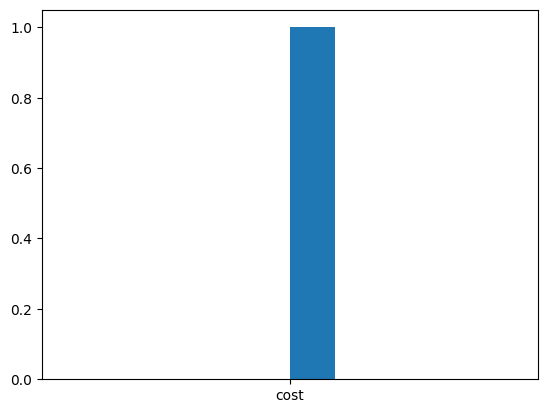

In [41]:
full_name = df['full_name']
full_name.describe()
states = df["states"].value_counts()
states_new = pd.DataFrame.from_dict(states)
states_top_3 = states_new.head(3)

display(states_new)

plt.hist('cost', data= states_new)



In [58]:
states_top_3['count']

states
DC    28
CA    28
NY    24
Name: count, dtype: int64

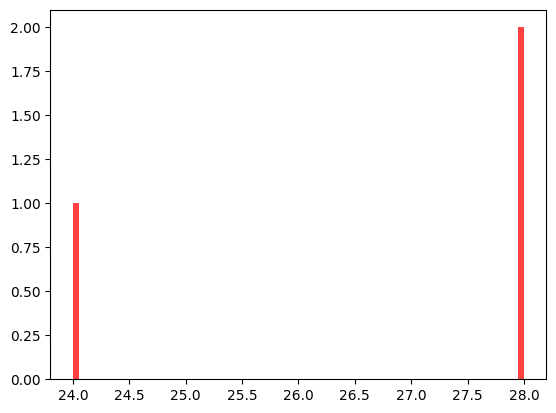

In [53]:
plt.hist(states_top_3, bins = 75, label = 'Data', color = 'r', alpha = 0.75)
plt.show()

## What Are The Top Parks With The Most Activities?

(array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]),
 array([-0.5, -0.4, -0.3, -0.2, -0.1,  0. ,  0.1,  0.2,  0.3,  0.4,  0.5]),
 <BarContainer object of 10 artists>)

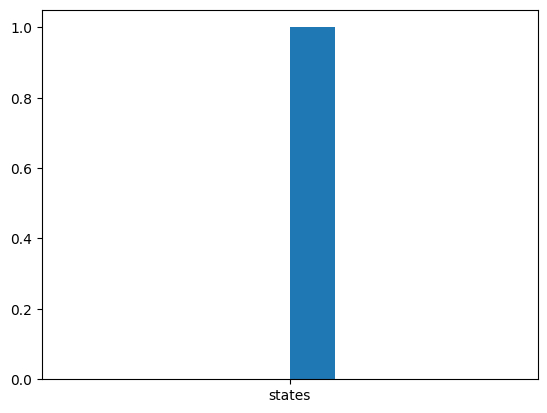

In [26]:
activity_count = df['activities']
activity_count
plt.hist("states", data= activity_count)